# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data

In [4]:
train=pd.read_csv('train.csv',index_col=0)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

# 1.Missing Data

In [5]:
train.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


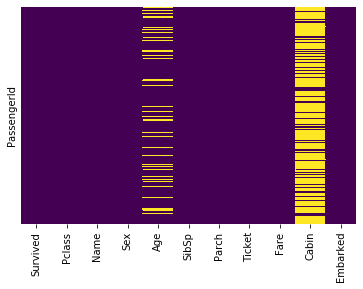

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

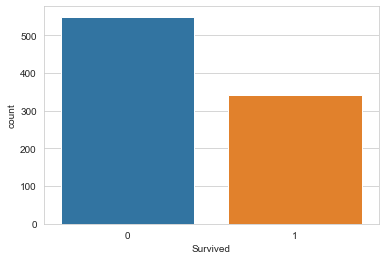

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

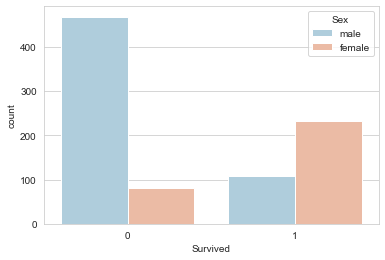

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

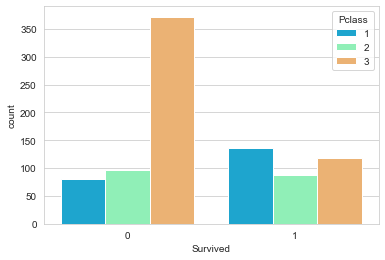

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

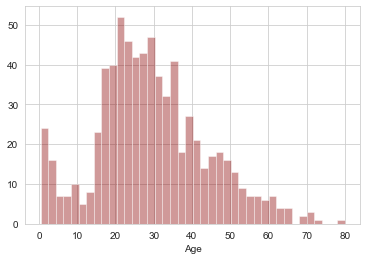

In [10]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

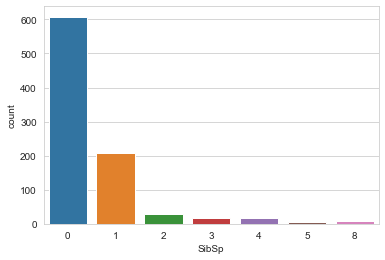

In [11]:
sns.countplot(x='SibSp',data=train)

# 2. Data Cleaning

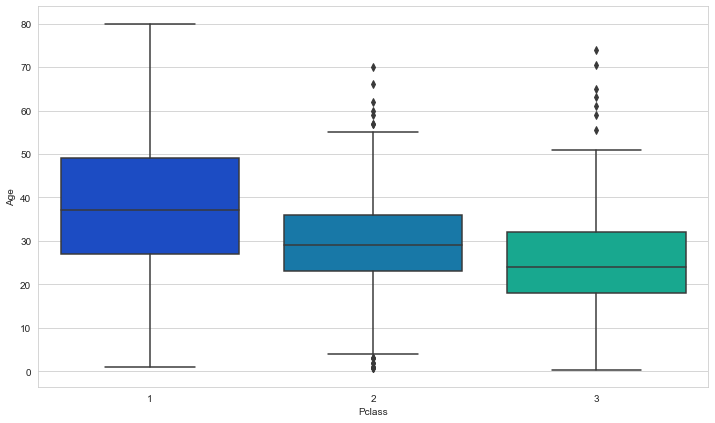

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

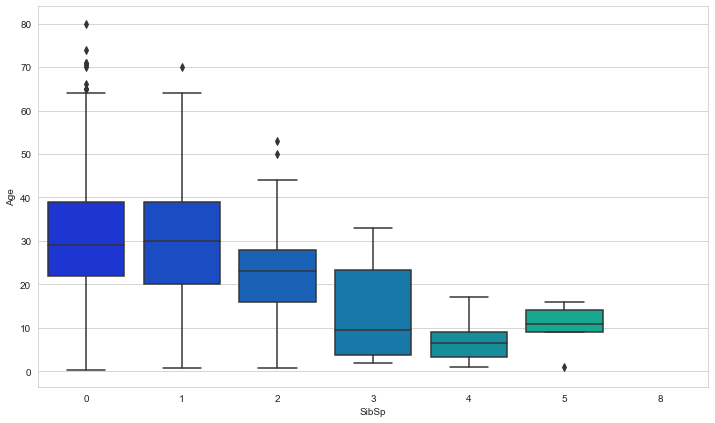

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='SibSp',y='Age',data=train,palette='winter')

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

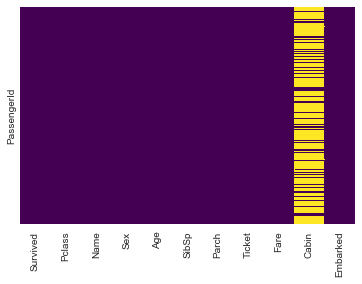

In [15]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
train.drop('Cabin',axis=1,inplace=True)

In [17]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


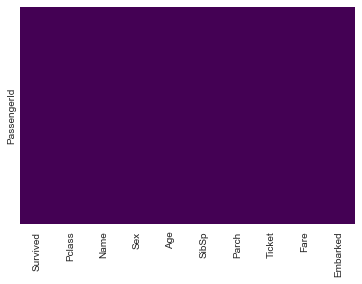

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# 3.Converting Categorical Features

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 116.6+ KB


In [20]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1


In [21]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [22]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


In [23]:
train = pd.concat([train,sex,embark],axis=1)

In [24]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression model

In [25]:
train.drop('Survived',axis=1).head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,1,0,1
2,1,38.0,1,0,71.2833,0,0,0
3,3,26.0,0,0,7.9250,0,0,1
4,1,35.0,1,0,53.1000,0,0,1
5,3,35.0,0,0,8.0500,1,0,1


In [26]:
train['Survived'].head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

# Training and Predicting

In [29]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\91726\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[133,  21],
       [ 38,  76]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7798507462686567

# Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.1,max_depth=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[143  11]
 [ 30  84]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       154
           1       0.88      0.74      0.80       114

    accuracy                           0.85       268
   macro avg       0.86      0.83      0.84       268
weighted avg       0.85      0.85      0.84       268



In [43]:
prediction =model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_in=accuracy_score(y_test,predictions)
accuracy_in

0.8470149253731343

In [46]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 



#training data
X = train.drop(['Survived'], axis=1)
stdscale=StandardScaler()
X_scaled = stdscale.fit_transform(X)
y = train.Survived.copy()

In [47]:
#split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5) #%25 of the data used for test set

#fitting the model
model = LogisticRegression(max_iter = 500000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test) #test labels, true response values
print('The accuracy of the Logistic Regression is:',accuracy)

The accuracy of the Logistic Regression is: 0.8340807174887892


In [48]:
from sklearn.model_selection import cross_val_score #score evaluation: CROSS VALIDATION
from sklearn.model_selection import cross_val_predict #prediction

#Kfold
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_result = cross_val_score(model, X_scaled, y, cv = kfold, scoring = "accuracy")
cv_result.mean() # mean accuracy of kfold

0.7979900124843944

In [49]:
#Stratified Kfold
stkfold=StratifiedKFold(n_splits=10)
#you can use cross_val_score as well to find scores. this is just for variety.
accuracy=[]
for train_index, test_index in stkfold.split(X_scaled, y):
    x1_train, x1_test= X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test= y.iloc[train_index], y.iloc[test_index]
    model.fit(x1_train, y1_train)
    prediction=model.predict(x1_test)
    score=accuracy_score(prediction, y1_test)
    accuracy.append(score)

print(accuracy)

[0.7888888888888889, 0.797752808988764, 0.7752808988764045, 0.8426966292134831, 0.8202247191011236, 0.7865168539325843, 0.797752808988764, 0.797752808988764, 0.797752808988764, 0.8314606741573034]


In [50]:
# mean accuracy of stratified kfold
np.mean(accuracy)

0.8036079900124843

Text(0.5, 16.0, 'Predicted Value')

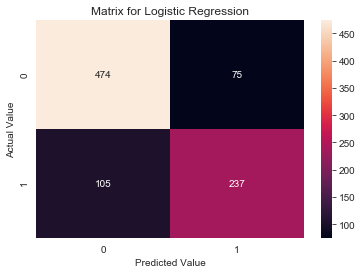

In [51]:
from sklearn.metrics import confusion_matrix #for confusion matrix

fig=plt.subplot()
ax=plt.gca()
y_pred = cross_val_predict(model,X_scaled,y,cv=kfold)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='2.0f')
ax.set_title('Matrix for Logistic Regression')
ax.set_ylabel('Actual Value')
ax.set_xlabel('Predicted Value')